图像已保存到: /home/pxl/myProject/血管分割/molong-深度插值/molong-utils/combined_image.png


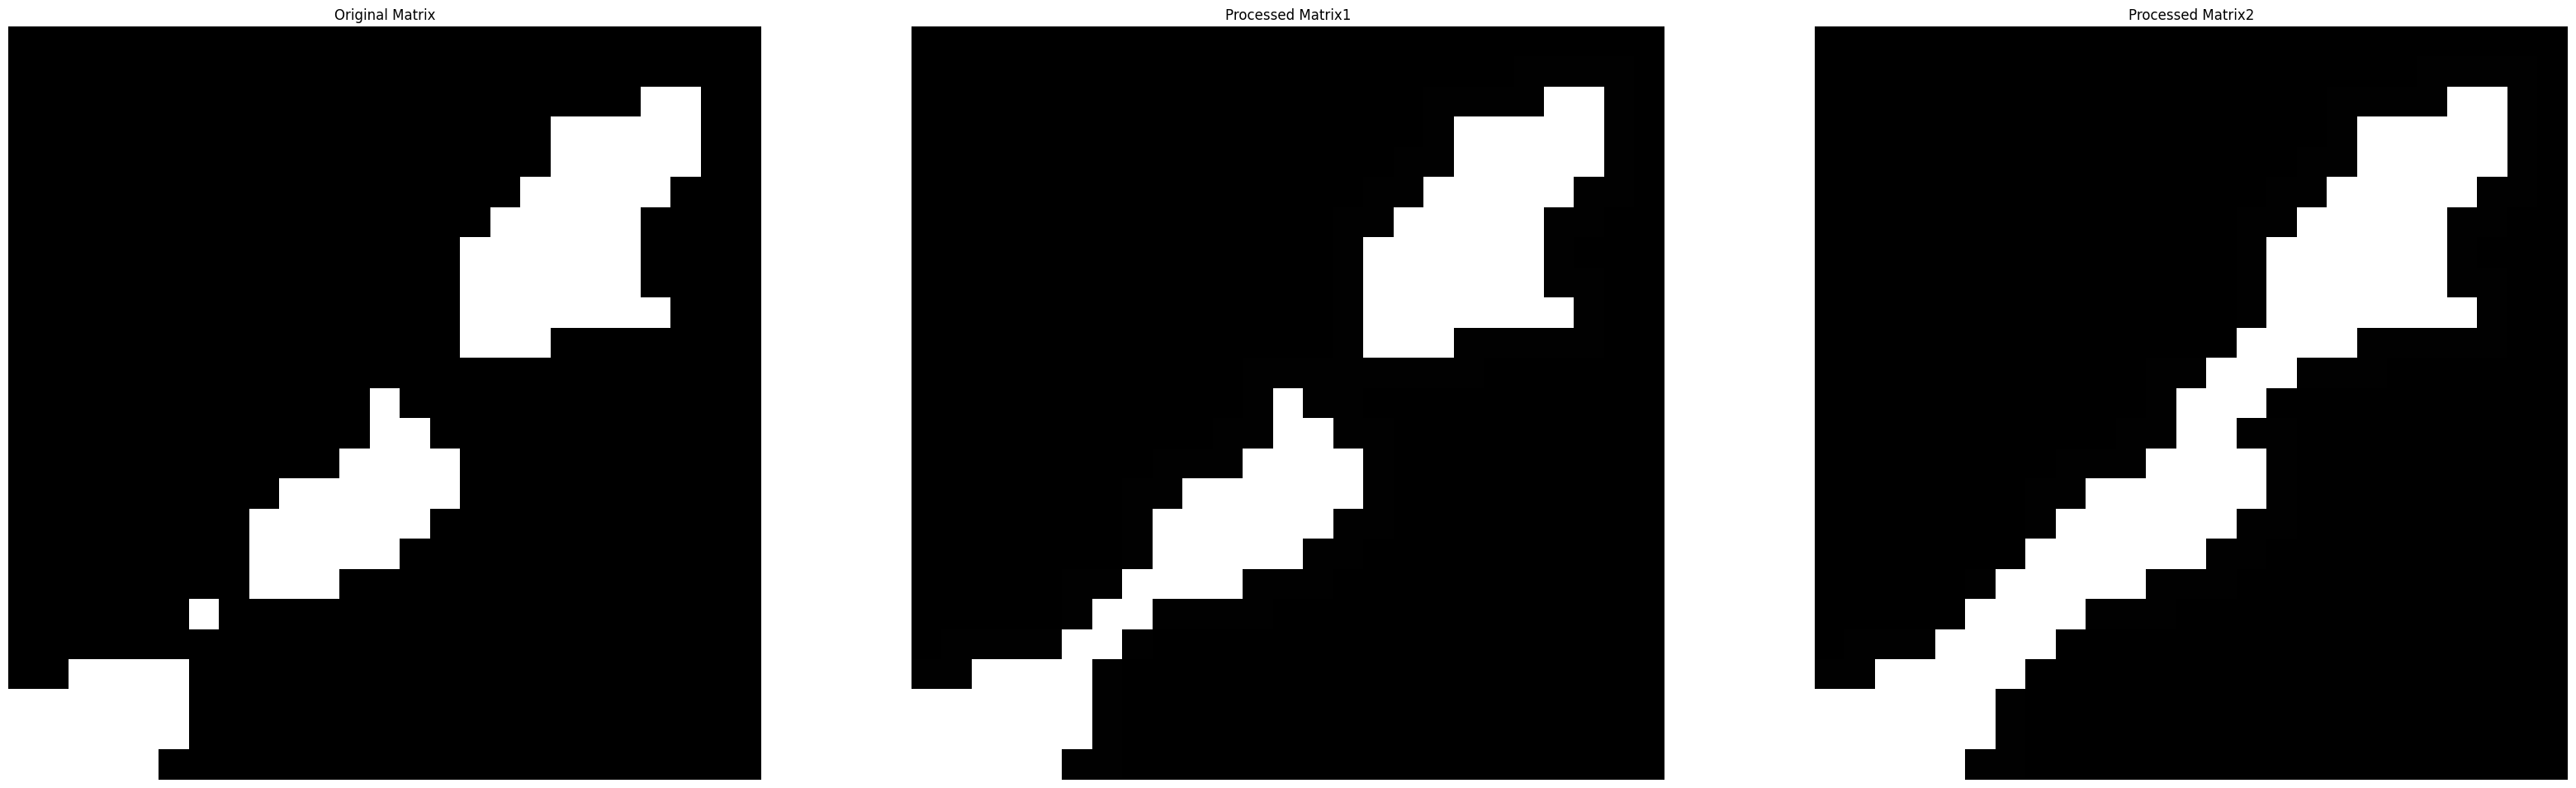

In [1]:
import 差分约束 as DifferentialConnection
import numpy as np

# 原始图像矩阵
intput = np.array([
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [ 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [ 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [ 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
])

edges = DifferentialConnection.extract_edges(intput)
labels = DifferentialConnection.bfs_label(intput,edges)

newMatrix = intput.copy() # 复制原始矩阵
enhance,contributions =  DifferentialConnection.enhance_edges(newMatrix, edges, labels)
ConnResult = DifferentialConnection.set_values_to_max(enhance)

# 迭代相邻增强

ConnResult1 = DifferentialConnection.set_values_to_max(enhance.copy())

flag = DifferentialConnection.mark_combined_contributions(contributions, enhance)
enhance = DifferentialConnection.set_values_by_flag(enhance,flag,3)
ConnResult2 = DifferentialConnection.set_values_to_max(enhance.copy())

save_path = "/home/pxl/myProject/血管分割/molong-深度插值/molong-utils/combined_image.png"  # 指定保存路径
DifferentialConnection.save_combined_image(intput,ConnResult1,ConnResult2, save_path,save=False)

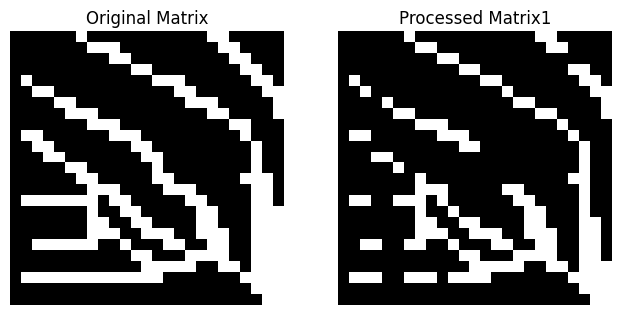

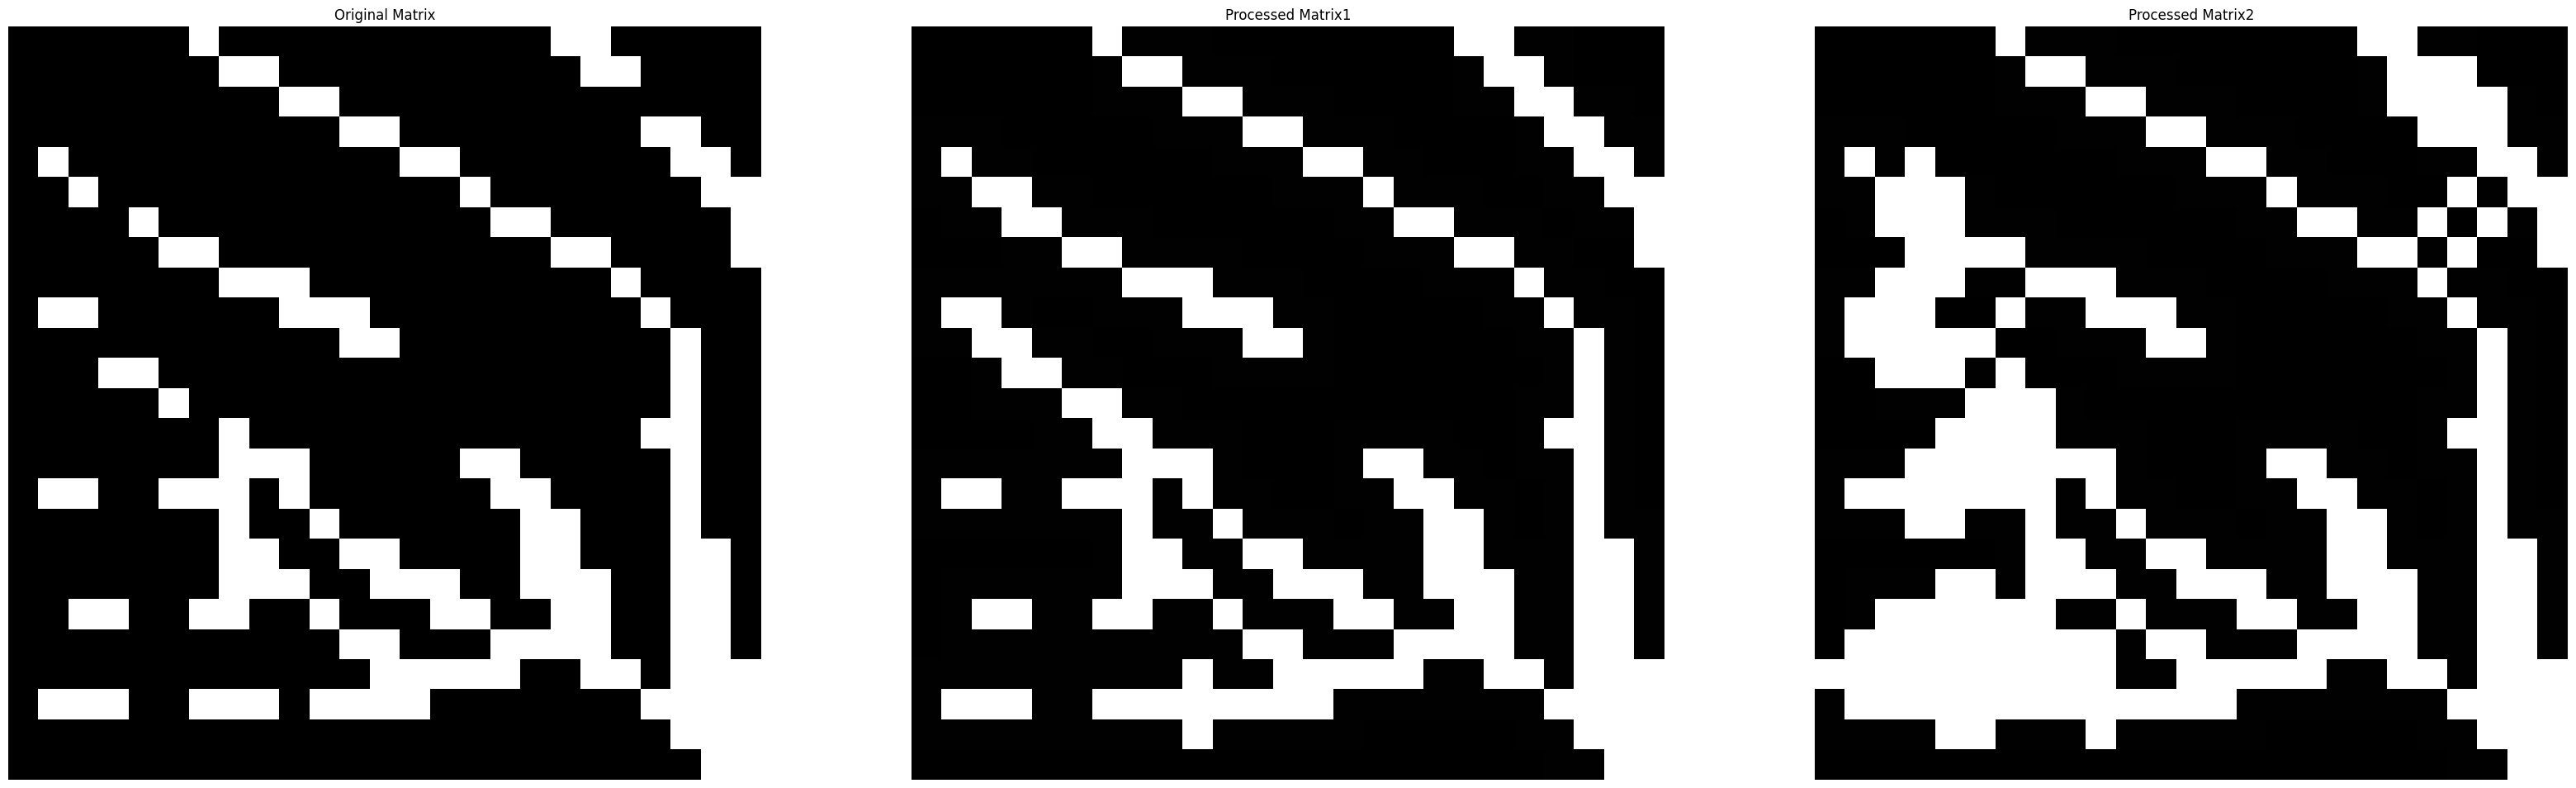

In [2]:
import matplotlib.pyplot as plt

g2_matrix_example_GT= np.array([
    [   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0 ],
    [   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255,   0 ],
    [   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255 ],
    [   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0, 255 ],
    [   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0, 255 ],
    [   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0 ],
    [   0, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0 ],
    [   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0 ],
    [   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0 ],
    [   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0 ],
    [   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0 ],
    [   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0, 255, 255,   0 ],
    [   0, 255, 255, 255, 255, 255, 255, 255,   0, 255, 255,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0, 255, 255,   0 ],
    [   0,   0,   0,   0,   0,   0,   0, 255,   0,   0, 255, 255,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0, 255, 255, 255 ],
    [   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0, 255, 255,   0,   0,   0,   0, 255, 255,   0,   0,   0, 255, 255, 255 ],
    [   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0, 255, 255, 255,   0,   0, 255, 255, 255,   0,   0, 255, 255, 255 ],
    [   0,   0, 255, 255, 255, 255, 255, 255,   0,   0, 255,   0,   0,   0, 255, 255,   0,   0, 255, 255,   0,   0, 255, 255, 255 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0, 255, 255, 255, 255,   0,   0, 255, 255, 255 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0, 255, 255,   0, 255, 255, 255 ],
    [   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255 ],
])

g2_matrix_example_Pred = np.array([
    [   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0 ],
    [   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0 ],
    [   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0, 255, 255 ],
    [   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0, 255 ],
    [   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0, 255 ],
    [   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0 ],
    [   0, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0 ],
    [   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0 ],
    [   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0, 255,   0,   0 ],
    [   0, 255, 255,   0,   0, 255, 255, 255,   0, 255,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0, 255,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0, 255,   0,   0, 255,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0, 255,   0,   0 ],
    [   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0, 255, 255,   0,   0,   0,   0, 255, 255,   0,   0,   0, 255, 255,   0 ],
    [   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0, 255, 255, 255,   0,   0, 255, 255, 255,   0,   0, 255, 255,   0 ],
    [   0,   0, 255, 255,   0,   0, 255, 255,   0,   0, 255,   0,   0,   0, 255, 255,   0,   0, 255, 255,   0,   0, 255, 255,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0, 255, 255, 255, 255,   0,   0, 255, 255,   0 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0, 255, 255,   0, 255, 255, 255 ],
    [   0, 255, 255, 255,   0,   0, 255, 255, 255,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255 ],
    [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255 ],
])





plt.figure(figsize=(12, 6))

# 绘制原始矩阵
plt.subplot(1, 3, 1)
plt.imshow(g2_matrix_example_GT, cmap='gray')
plt.title("Original Matrix")
plt.axis('off')

# 绘制处理后的矩阵
plt.subplot(1, 3, 2)
plt.imshow(g2_matrix_example_Pred, cmap='gray')
plt.title("Processed Matrix1")
plt.axis('off')

intput = g2_matrix_example_Pred.copy()
edges = DifferentialConnection.extract_edges(intput)
labels = DifferentialConnection.bfs_label(intput,edges)

newMatrix = g2_matrix_example_Pred.copy() # 复制原始矩阵
enhance,contributions =  DifferentialConnection.enhance_edges(newMatrix, edges, labels)
ConnResult = DifferentialConnection.set_values_to_max(enhance)

# 迭代相邻增强

ConnResult1 = DifferentialConnection.set_values_to_max(enhance.copy())

flag = DifferentialConnection.mark_combined_contributions(contributions, enhance)
enhance = DifferentialConnection.set_values_by_flag(enhance,flag,3)
ConnResult2 = DifferentialConnection.set_values_to_max(enhance.copy())

save_path = "/home/pxl/myProject/血管分割/molong-深度插值/molong-utils/combined_image.png"  # 指定保存路径
DifferentialConnection.save_combined_image(intput,ConnResult1,ConnResult2, save_path,save=False)

In [3]:
import matplotlib.pyplot as plt
import 差分约束 as DifferentialConnection
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def crop_image(image_path, position, size,isCrop=True):
    # 打开图像
    cropped_image = Image.open(image_path).convert('L') 
    if(isCrop):
      # 计算裁剪区域的边界
      left = position[0]
      upper = position[1]
      right = left + size[0]
      lower = upper + size[1]
      # 裁剪图像
      cropped_image = cropped_image.crop((left, upper, right, lower))
    return cropped_image

path = '/home/pxl/myProject/血管分割/molong-深度插值/molong-utils/数据集以及结果处理/pred.png'
position = (220, 230)  # 裁剪的起始位置 (x, y)
size = (80, 60)  # 裁剪区域的尺寸 (width, height)
cropped_image = crop_image(path, position, size,True)
g2_matrix_example_Pred = np.array(cropped_image) 


intput = g2_matrix_example_Pred.copy()
edges = DifferentialConnection.extract_edges(intput)
labels = DifferentialConnection.bfs_label(intput,edges)

newMatrix = g2_matrix_example_Pred.copy() # 复制原始矩阵
enhance,contributions =  DifferentialConnection.enhance_edges(newMatrix, edges, labels)
ConnResult1 = DifferentialConnection.set_values_to_max(enhance)

# # 绘制处理后的矩阵
# plt.figure(figsize=(40, 25))
# plt.subplot(1, 3, 1)
# plt.imshow(g2_matrix_example_Pred, cmap='gray',interpolation='none')
# plt.title("Processed Matrix1")
# plt.axis('off')
# 绘制处理后的矩阵     ###============根本就没有效果,太少了


# # 迭代相邻增强

flag = DifferentialConnection.mark_combined_contributions(contributions, enhance)
enhance = DifferentialConnection.set_values_by_flag(enhance,flag,3)
ConnResult2 = DifferentialConnection.set_values_to_max(enhance.copy())

save_path = "/home/pxl/myProject/血管分割/molong-深度插值/molong-utils/combined_image.png"  # 指定保存路径
DifferentialConnection.save_combined_image(g2_matrix_example_Pred,ConnResult1,ConnResult2, save_path,save=True)


# plt.imshow(ConnResult2, cmap='gray')
# plt.imsave('/home/pxl/myProject/血管分割/molong-深度插值/molong-utils/combined_image_final.png',ConnResult2)

图像已保存到: /home/pxl/myProject/血管分割/molong-深度插值/molong-utils/combined_image.png


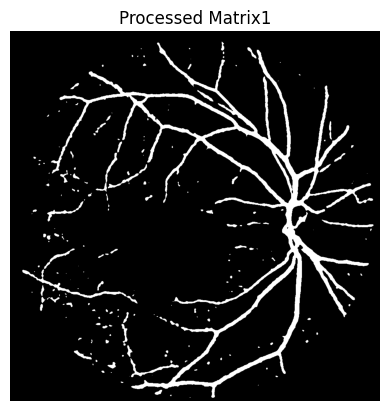

In [4]:
import matplotlib.pyplot as plt
import 差分约束 as DifferentialConnection
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def normalize_to_255(matrix):
    """
    将输入矩阵规范化到0-255的范围。
    
    :param matrix: 输入的数值矩阵
    :return: 规范化后的矩阵
    """
    # 将矩阵转为float类型，防止数据溢出
    matrix = matrix.astype(np.float32)
    
    # 获取矩阵的最小值和最大值
    min_val = matrix.min()
    max_val = matrix.max()
    
    # 规范化矩阵到0-255
    normalized_matrix = (matrix - min_val) / (max_val - min_val) * 255
    
    # 转换为uint8类型
    return normalized_matrix.astype(np.uint8)




path = '/home/pxl/myProject/血管分割/molong-深度插值/molong-utils/数据集以及结果处理/pred.png'
img = Image.open(path)  # 将图像转换为灰度模式 ('L' 表示灰度图)
g2_matrix_example_Pred = np.array(img)[:,:,0]  # 将像素值标准化为 0 到 255

# 规范化到0-255
normalized_matrix = normalize_to_255(g2_matrix_example_Pred)

plt.subplot(1, 1, 1)
plt.imshow(normalized_matrix, cmap='gray')
plt.title("Processed Matrix1")
plt.axis('off')

plt.imsave(path,normalized_matrix)


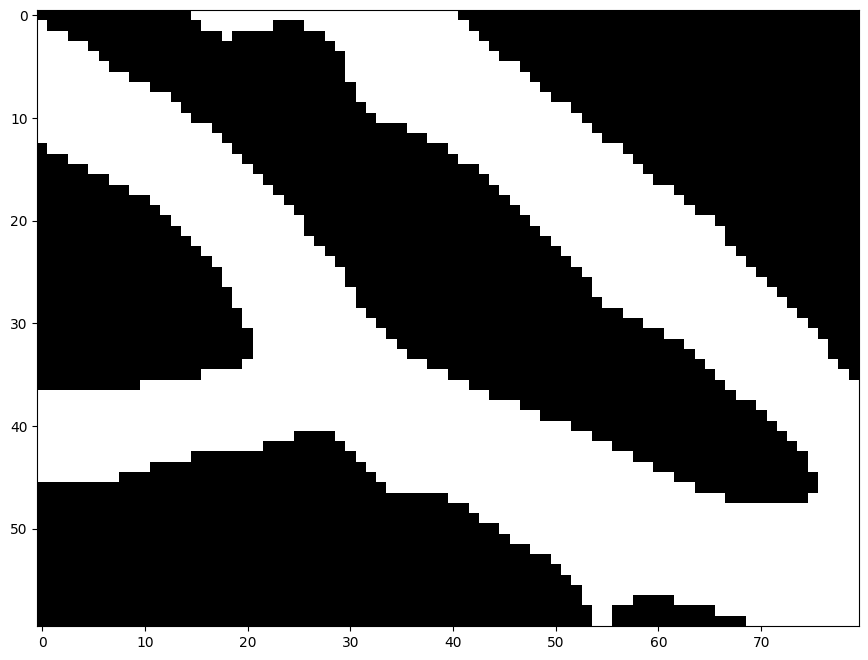

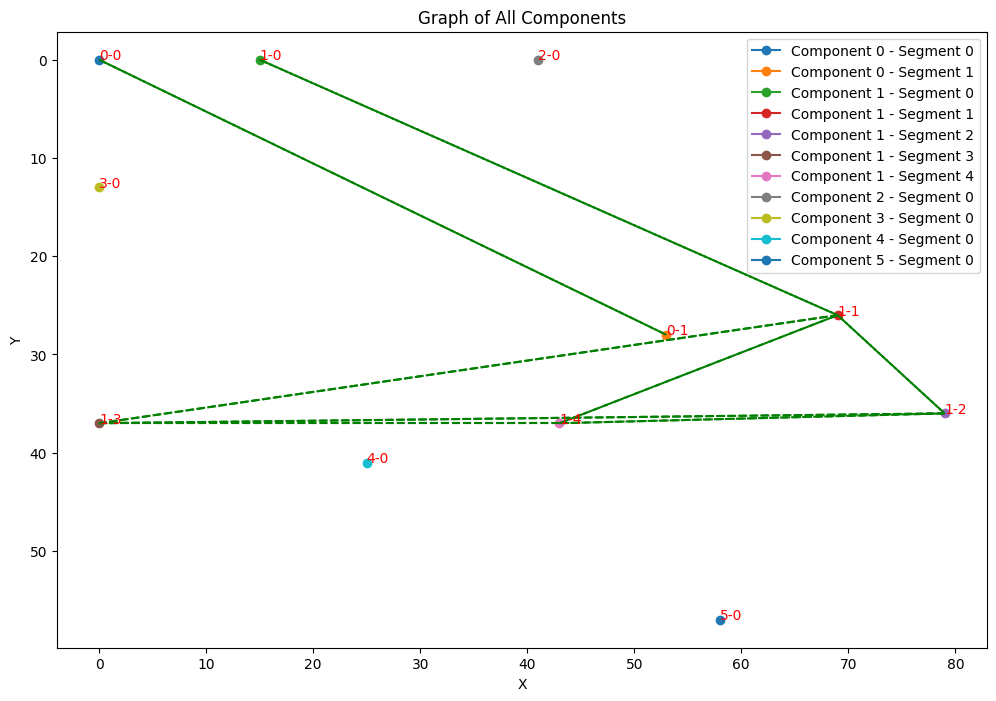

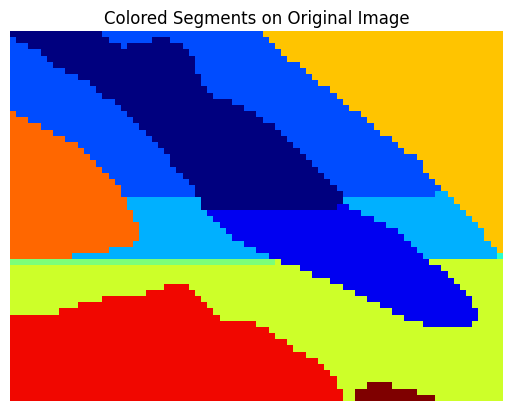